In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb 

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
store = pd.read_csv('store.csv')


/var/folders/5s/jcx1bbbj423bxf9z2l296d800000gn/T/ipykernel_4042/2873835997.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


In [4]:
print('Training Data Shape : ',train.shape)
print('Test Data Shape : ',test.shape)
print('Store Data Shape : ',store.shape)

Training Data Shape :  (1017209, 9)
Test Data Shape :  (41088, 8)
Store Data Shape :  (1115, 10)


In [5]:
train.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
574600,46,6,2014-02-01,4930,702,1,0,0,0
79833,669,4,2015-05-21,5383,426,1,1,0,0
317089,360,1,2014-10-06,10459,1008,1,1,0,0
486439,1085,2,2014-04-22,6794,746,1,0,0,1
699580,146,6,2013-10-12,6499,657,1,0,0,0
192963,69,7,2015-02-08,0,0,0,0,0,0
615845,36,4,2013-12-26,0,0,0,0,c,1
313827,934,5,2014-10-10,8155,811,1,1,0,1
734830,831,3,2013-09-11,14367,1712,1,1,0,0
496603,99,6,2014-04-12,5036,497,1,0,0,0


In [6]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [7]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
not_open = train[(train['Open'] == 0) & (train['Sales'] != 0)]
print("No closed store with sales: " + str(not_open.size == 0))

no_sales = train[(train['Open'] == 1) & (train['Sales'] <= 0)]
print("No open store with no sales: " + str(no_sales.size == 0))

No closed store with sales: True
No open store with no sales: False


In [9]:
train = train.loc[train['Sales'] > 0]

In [10]:
print('New Training Data Shape : ',train.shape)

New Training Data Shape :  (844338, 9)


In [11]:
dates = pd.to_datetime(train['Date']).sort_values()
dates = dates.unique()
start_date = dates[0]
end_date = dates[-1]
print("Start date: ", start_date)
print("End Date: ", end_date)
date_range = pd.date_range(start_date, end_date).values

Start date:  2013-01-01T00:00:00.000000000
End Date:  2015-07-31T00:00:00.000000000


# Visualization

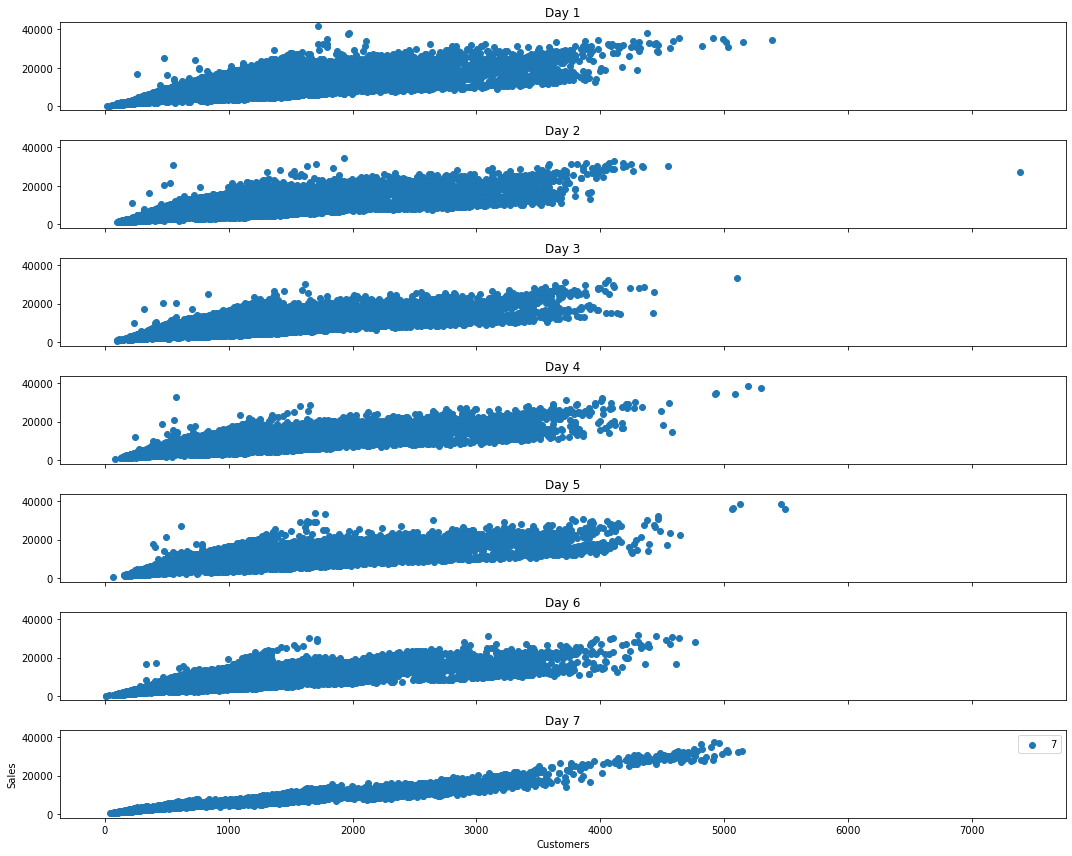

In [12]:
plt.rcParams['figure.figsize'] = (15.0, 12.0)

f, ax = plt.subplots(7, sharex=True, sharey=True)
for i in range(1, 8):
    data = train[train['DayOfWeek'] == i]
    ax[i - 1].set_title("Day {0}".format(i))
    ax[i - 1].scatter(data['Customers'], data['Sales'], label=i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


General Corelation between customer and sales Observed in the above plot

In [13]:
#ploting customer vs sales for each day of week
plt.scatter(train['Customers'], train['Sales'], c=train['DayOfWeek'], alpha=0.6, cmap=plt.cm.get_cmap('YlGn'))

plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()


KeyboardInterrupt: 

In [ ]:
for i in [0, 1]:
    data = train[train['SchoolHoliday'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

In [ ]:
for i in [0, 1]:
    data = train[train['Promo'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

In [ ]:
train.head()

In [ ]:
train['SalesPerCustomer'] = train['Sales'] / train['Customers']

avg_store = train.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].mean()
avg_store.rename(columns=lambda x: 'Avg' + x, inplace=True)
store = pd.merge(avg_store.reset_index(), store, on='Store')
store.head()

In [ ]:
avg_store.head()

In [ ]:
for i in store.StoreType.unique():
    data = store[store['StoreType'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)

plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

In [ ]:
store.Assortment.unique()

In [ ]:
for i in store.Assortment.unique():
    data = store[store['Assortment'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)

plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

In [ ]:
store.Promo2.unique()

In [ ]:
for i in store.Promo2.unique():
    data = store[store['Promo2'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)

plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

# Feature Engineering

In [ ]:
store.isnull().sum()

In [ ]:


# fill NaN values
store["CompetitionDistance"].fillna(-1)


plt.scatter(store['CompetitionDistance'], store['AvgSales'])

plt.xlabel('CompetitionDistance')
plt.ylabel('Average Sales')
plt.show()



In [ ]:
store.head()

In [ ]:
store['StoreType'] = store['StoreType'].astype('category').cat.codes
store['Assortment'] = store['Assortment'].astype('category').cat.codes
train["StateHoliday"] = train["StateHoliday"].astype('category').cat.codes
store.head()

In [ ]:
train.head()

In [ ]:
merged = pd.merge(train, store, on='Store', how='left')
merged.head()

In [ ]:
merged.shape

In [ ]:
merged.isnull().sum()

In [ ]:
# remove NaNs
merged.fillna(0, inplace=True)

In [ ]:
merged['Date'] = pd.to_datetime(merged['Date'])
merged.dtypes

In [ ]:
merged['Year'] = merged.Date.dt.year
merged['Month'] = merged.Date.dt.month
merged['Day'] = merged.Date.dt.day
merged['Week'] = merged.Date.dt.week
merged.head()

In [ ]:
# Number of months that competition has existed for
merged['MonthsCompetitionOpen'] = 12 * (merged['Year'] - merged['CompetitionOpenSinceYear']) + (merged['Month'] - merged['CompetitionOpenSinceMonth'])
merged.loc[merged['CompetitionOpenSinceYear'] == 0, 'MonthsCompetitionOpen'] = 0


In [ ]:
    
    # Number of weeks that promotion has existed for
merged['WeeksPromoOpen'] = 12 * (merged['Year'] - merged['Promo2SinceYear']) + (merged['Date'].dt.weekofyear - merged['Promo2SinceWeek'])
merged.loc[merged['Promo2SinceYear'] == 0, 'WeeksPromoOpen'] = 0

In [ ]:
merged.dtypes

In [ ]:
toInt = [
        'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear',
        'Promo2SinceWeek', 
        'Promo2SinceYear', 
        'MonthsCompetitionOpen', 
        'WeeksPromoOpen']

merged[toInt] = merged[toInt].astype(int)


In [ ]:
med_store = train.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].median()
med_store.rename(columns=lambda x: 'Med' + x, inplace=True)

store = pd.merge(med_store.reset_index(), store, on='Store')


In [ ]:
store.head()

In [ ]:
merged = pd.merge(med_store.reset_index(), merged, on='Store')
merged.head()

In [ ]:
merged.columns

In [ ]:
merged.hist(figsize=(20,20))
plt.show()

In [ ]:
#merged[X].head()

# Model Building and Evaluation

In [ ]:
# 'Store', 'MedSales', 'MedCustomers', 'MedSalesPerCustomer', 'DayOfWeek',
#        'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
#        'SchoolHoliday', 'SalesPerCustomer', 'AvgSales', 'AvgCustomers',
#        'AvgSalesPerCustomer', 'StoreType', 'Assortment', 'CompetitionDistance',
#        'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
#        'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
#        'Day', 'Week', 'MonthsCompetitionOpen', 'WeeksPromoOpen'],

In [ ]:
from sklearn.model_selection import train_test_split
X = [
    'Store', 
    'Customers',
    'CompetitionDistance', 

    'Promo', 
    'Promo2', 

    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'Promo2SinceWeek',
    'Promo2SinceYear',

    
    'StateHoliday',
    'StoreType',
    'Assortment',

    'AvgSales',
    'AvgCustomers',
    'AvgSalesPerCustomer',
    
    'MedSales',
    'MedCustomers',
    'MedSalesPerCustomer',

    'DayOfWeek',
    'Week',
    'Day',
    'Month',
    'Year',

]
X_data = merged[X]
Y_data = np.log(merged['Sales'])
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.20, random_state=10)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,mean_squared_error



def plot_importance(model):
    k = list(zip(X, model.feature_importances_))
    k.sort(key=lambda tup: tup[1])

    labels, vals = zip(*k)
    
    plt.barh(np.arange(len(X)), vals, align='center')
    plt.yticks(np.arange(len(X)), labels)

In [ ]:
%%time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param ={
            'n_estimators': [100,500, 1000,1500],
            'max_depth':[2,4,6,8]
        }

xgboost_tree = xgb.XGBRegressor(
    eta = 0.1,
    min_child_weight = 2,
    subsample = 0.8,
    colsample_bytree = 0.8,
    tree_method = 'exact',
    reg_alpha = 0.05,
    silent = 0,
    random_state = 1023
)

grid = GridSearchCV(estimator=xgboost_tree,param_grid=param,cv=5,  verbose=1, n_jobs=-1,scoring='neg_mean_squared_error')
   
    

    
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_

print('Best Params :',best_params)


In [ ]:
from math import sqrt

pred = grid_result.predict(X_test)
print('Root Mean squared error {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))

In [ ]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys()) 
